# Baseline Surface Radiation Network (BSRN)

The Baselines Surface Radiation Network ([BSRN](https://bsrn.awi.de/)) is the only world-wide network of high-quality solar radiation monitoring stations.

A complete list of active and inactive stations can be found on the [bsrn website](https://wiki.pangaea.de/wiki/BSRN#Sortable_Table_of_Stations):

In [3]:
import pandas as pd
import pvlib
import os

bsrn_url = 'https://wiki.pangaea.de/wiki/BSRN#Sortable_Table_of_Stations'
bsrn_stations = pd.read_html(bsrn_url, index_col=1)[0]
bsrn_stations

,Station full name,Location,Latitude,Longitude,Elevation,First dataset in archive,Upward fluxes (in LR),Surface type,Topography type,Rural/Urban II,Comment
Abbreviation,,,,,,,,,,,
ABS,Abashiri,Japan,44.0178,144.2797,38.0,2021-03-01,NaN,asphalt,flat,rural,Candidate station (no. 86)
ALE,Alert,"Canada, Lincoln Sea",82.4900,-62.4200,127.0,2004-08-16,LR0300,tundra,hilly,rural,Closed
ASP,Alice Springs,"Australia, Northern Territory",-23.7980,133.8880,547.0,1995-01-01,NaN,grass,flat,rural,NaN
BAR,Barrow,"USA , Alaska",71.3230,-156.6070,8.0,1992-01-01,LR0300,tundra,flat,rural,NaN
BER,Bermuda,"USA, Bermuda",32.2670,-64.6670,8.0,1992-01-01,NaN,"water, ocean",flat,rural,NaN
...,...,...,...,...,...,...,...,...,...,...,...
TIR,Tiruvallur,India,13.0923,79.9738,36.0,2014-04-16,NaN,rock,flat,urban,NaN
TNB,Terra Nova Bay,Antarctica,-74.6223,164.2283,28.0,NaN,NaN,rock,hilly,rural,Candidate Station (no. 89)
TOR,Toravere,Estonia,58.2540,26.4620,70.0,1999-01-01,LR0300,grass,flat,rural,NaN


<br>

To visualize the geographical coverage of the BSRN, it is helpful to plot the stations on map. This can easily be achieved using the Folium library in Python, which generates an interactive map. This is especially useful when trying to locate the nearest BSRN station to a point of interest or get an overview of the coverage in a particular region.

In [4]:
import folium

# Initialize Folium map
m = folium.Map(
    location=[0, 15],
    zoom_start=1,
    min_zoom=1,
    max_bounds=True,
    tiles='openstreetmap',
    )

# Add each station to the map
for index, row in bsrn_stations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station full name']} ({row.name})",
        icon=folium.Icon(color='blue')
    ).add_to(m)

m  # Show the map

The distribution of the BSRN stations is clearly shown in the map above, with some regions having a high concentration of stations (e.g., Europe) and other regions with no stations (e.g., East Africa and most of Russia). Note also that the BSRN includes four stations in Antarctica.

In [4]:
bsrn_username = os.environ["BSRN_FTP_USERNAME"]
bsrn_password = os.environ["BSRN_FTP_PASSWORD"]

## Example data retrieval


In [9]:
df, meta = pvlib.iotools.get_bsrn(
    station='CAB',  # three letter code for the Cabaus station
    start=pd.Timestamp(2018,1,1),
    end=pd.Timestamp(2018,3,1),
    username=bsrn_username,
    password=bsrn_password,
)

df.head(10)

,ghi,ghi_std,ghi_min,ghi_max,dni,dni_std,dni_min,dni_max,dhi,dhi_std,dhi_min,dhi_max,lwd,lwd_std,lwd_min,lwd_max,temp_air,relative_humidity,pressure
2018-01-01 00:00:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.1,0.0,1.0,-1.0,0.1,-1.0,-1.0,310.0,0.7,309.0,312.0,8.5,77.6,996.0
2018-01-01 00:01:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,313.0,1.4,312.0,317.0,8.6,76.0,996.0
2018-01-01 00:02:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.1,0.0,0.0,-1.0,0.0,-1.0,-1.0,322.0,2.4,317.0,325.0,8.6,77.0,996.0
2018-01-01 00:03:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,317.0,2.1,315.0,322.0,8.5,77.0,996.0
2018-01-01 00:04:00+00:00,-1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,312.0,2.5,308.0,316.0,8.5,77.0,996.0
2018-01-01 00:05:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.1,0.0,0.0,-1.0,0.1,-1.0,-1.0,312.0,3.0,308.0,318.0,8.6,77.0,996.0
2018-01-01 00:06:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.1,0.0,0.0,-1.0,0.1,-1.0,-1.0,323.0,2.4,318.0,327.0,8.6,76.8,996.0
2018-01-01 00:07:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.1,-1.0,-1.0,329.0,0.5,327.0,329.0,8.5,77.4,996.0
2018-01-01 00:08:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.1,-1.0,-1.0,328.0,0.8,327.0,329.0,8.5,77.4,996.0
2018-01-01 00:09:00+00:00,-1.0,0.1,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.1,-1.0,-1.0,325.0,0.6,324.0,326.0,8.5,78.0,996.0


<br>

### Plot of hourly rradiance
From the dataframe above, it can be seen that the obtained data contains measurement of the three irradiance components (required for all BSRN stations).

To visualize the data we can resample to a one hour time resolution and then plot the three components of irradiance:

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

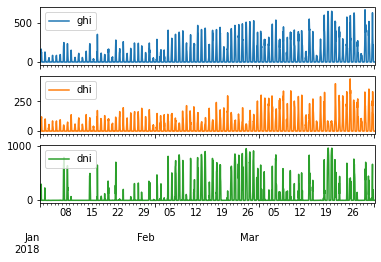

In [12]:
df[['ghi','dhi','dni']].resample('1h').mean().plot(subplots=True, sharex=True, rot=0)

In [2]:
import os
os.getenv()

TypeError: getenv() missing 1 required positional argument: 'key'